In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
import math as m
import random
import copy
import os
import copy
from scipy.signal import find_peaks
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def calculate_centroide(binary):
    """
    binary - бинарное изображение
    return - координаты центра объекта, который изображен на картинке 
    """
    m00 = binary.sum()
    m01 = binary.sum(axis=0) * np.arange(binary.shape[1])
    m01 = m01.sum()
    m10 = binary.sum(axis=1) * np.arange(binary.shape[0])
    m10 = m10.sum()
    y = round(m10 / m00)
    x = round(m01 / m00)
    
    return(x, y)

# При запуске следующей ячейки выскочет окно, в которое надо ввести путь к папке, в которой находятся изображения

In [24]:
print('Введите путь к папке, в которой находятся изображения')
print('Например: ./Training')
file = input()
file_names = os.listdir(path=file)

Введите путь к папке, в которой находятся изображения
Например: ./Training
./Training


# 1 - большой палец, 5 - мизинец

Ответ на задачу:  1-2-3-4-5


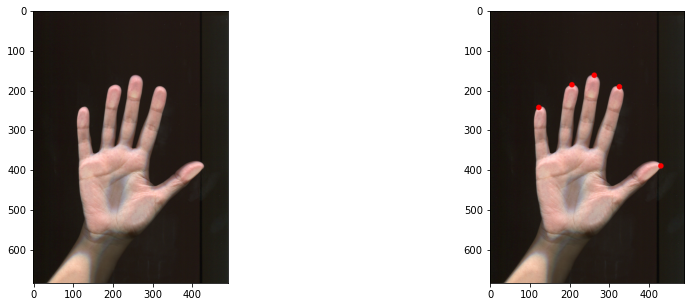

Ответ на задачу:  1+2+3+4+5


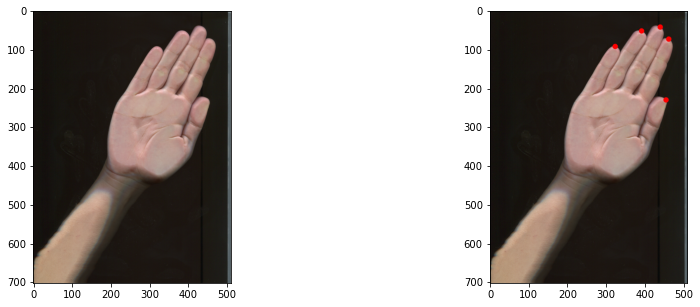

Ответ на задачу:  1-2+3-4-5


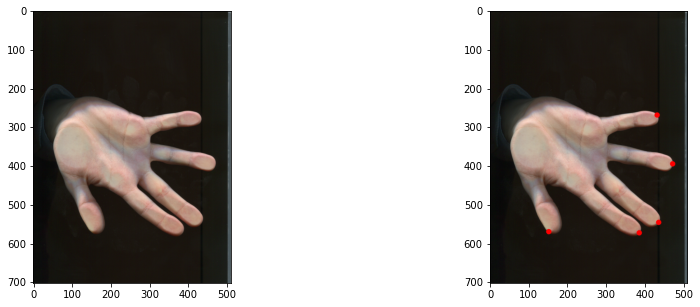

Ответ на задачу:  1+2-3-4+5


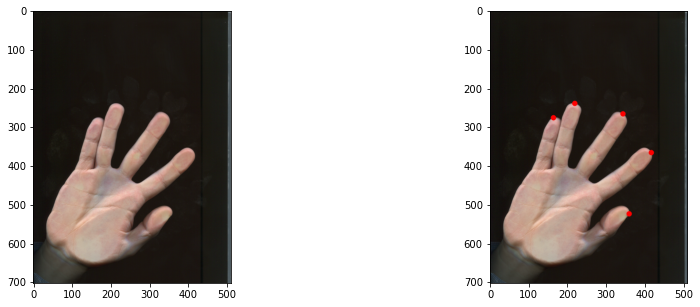

Ответ на задачу:  1-2+3-4-5


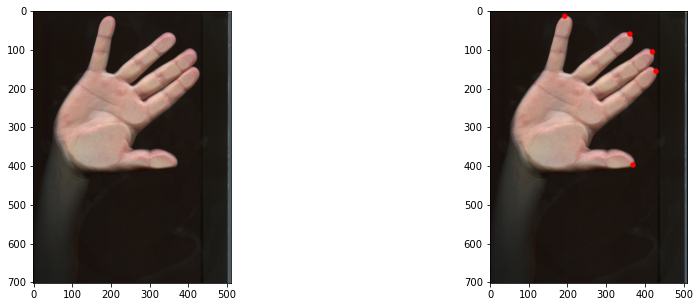

Ответ на задачу:  1-2-3+4+5


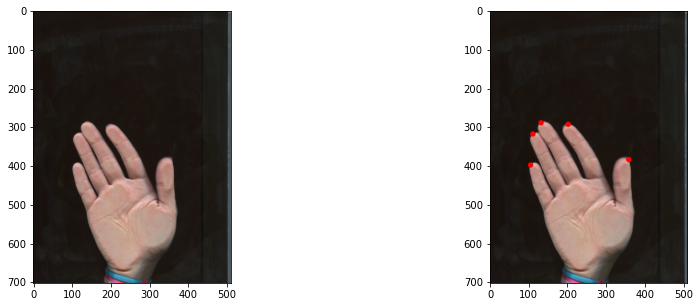

Ответ на задачу:  1+2-3-4+5


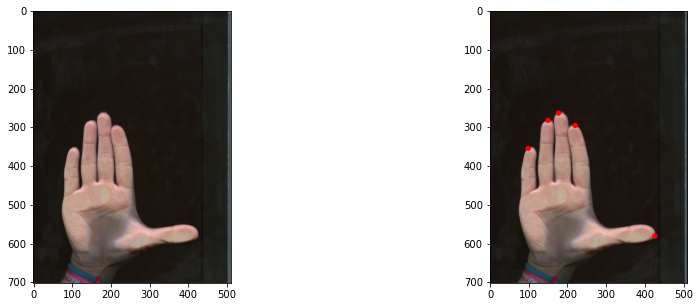

Ответ на задачу:  1-2+3+4+5


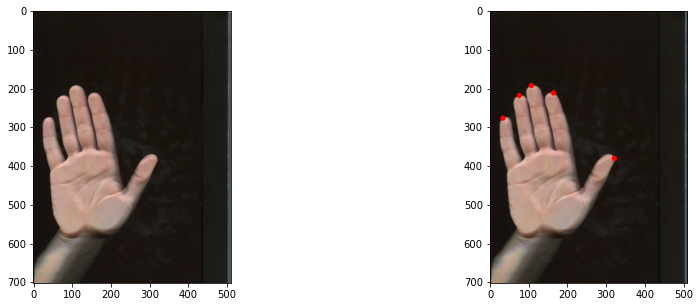

Ответ на задачу:  1-2+3+4-5


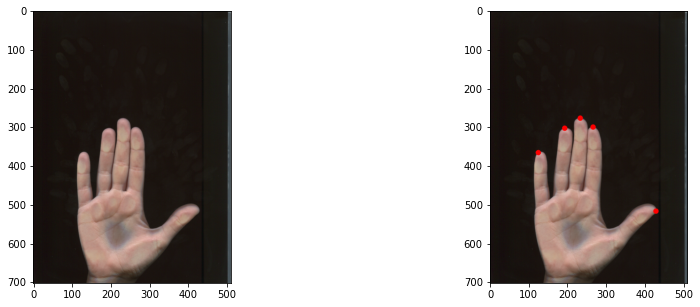

Ответ на задачу:  1-2+3+4+5


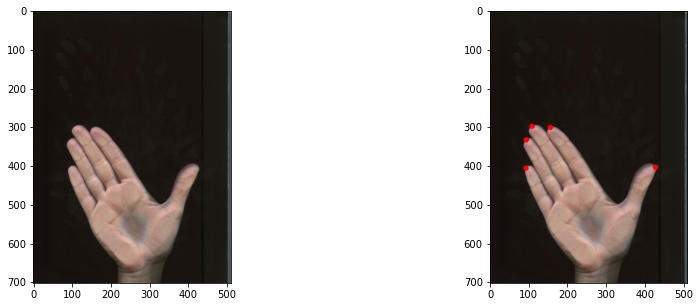

Ответ на задачу:  1-2+3+4-5


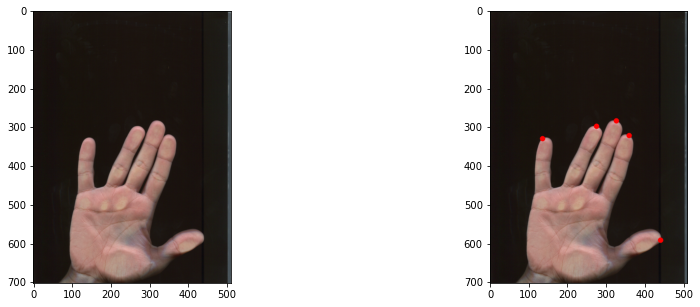

Ответ на задачу:  1-2-3-4+5


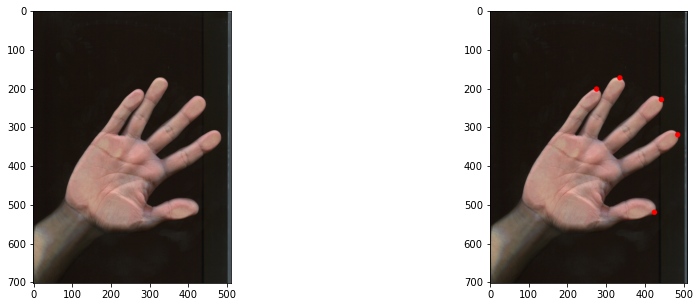

Ответ на задачу:  1-2+3-4-5


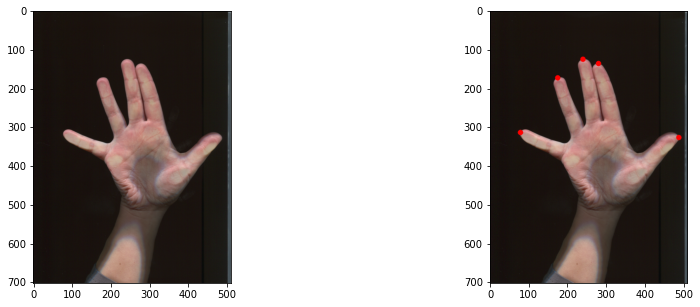

Ответ на задачу:  1-2+3-4+5


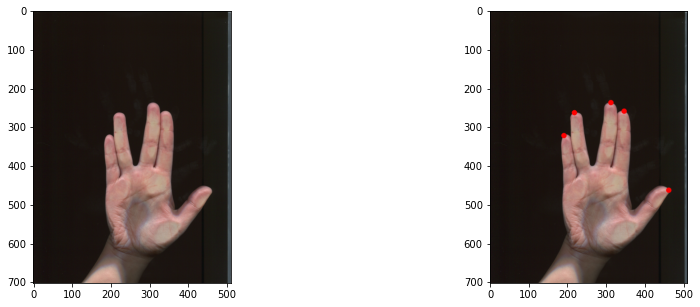

Ответ на задачу:  1-2-3-4-5


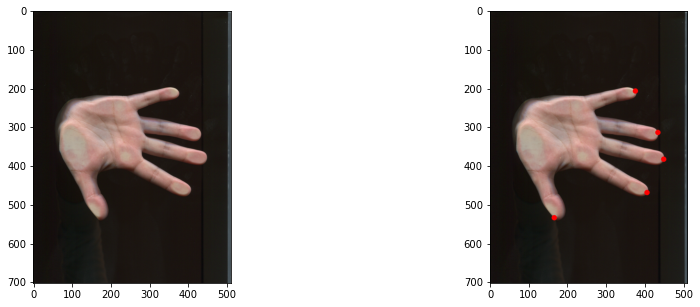

Ответ на задачу:  1-2-3-4-5


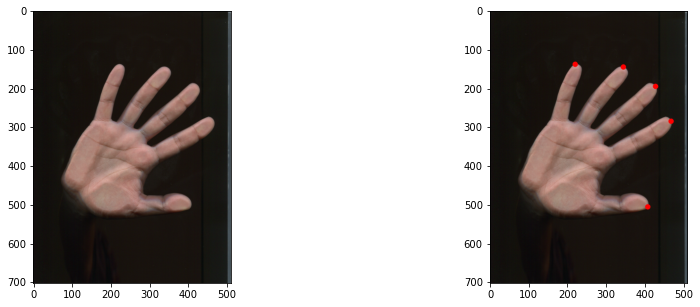

Ответ на задачу:  1-2-3-4-5


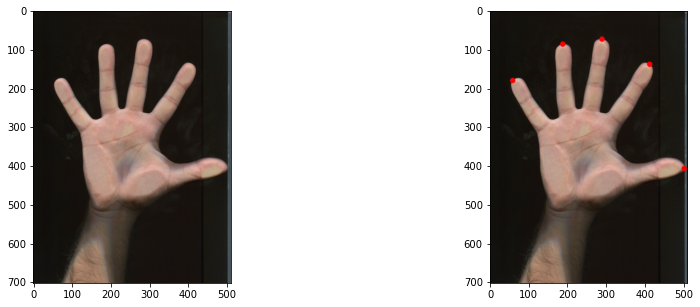

Ответ на задачу:  1-2-3+4-5


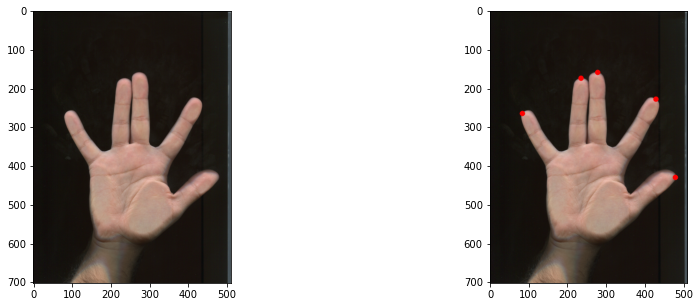

Ответ на задачу:  1+2+3-4+5


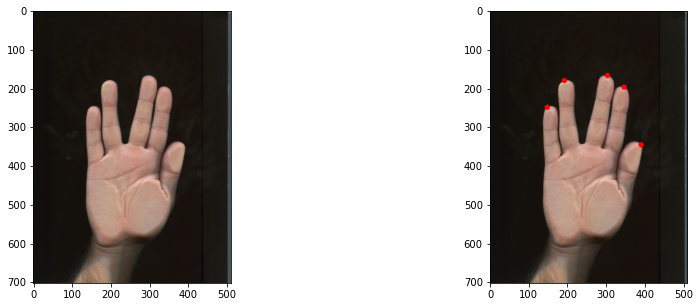

Ответ на задачу:  1-2-3-4-5


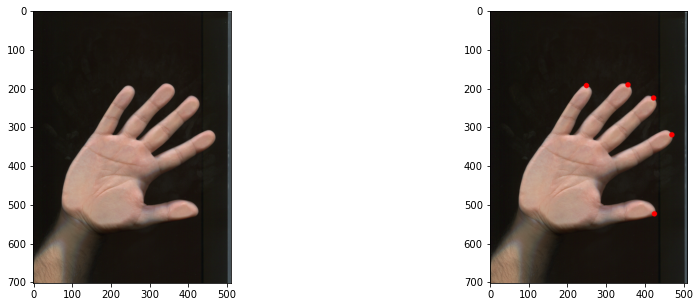

Ответ на задачу:  1-2+3+4-5


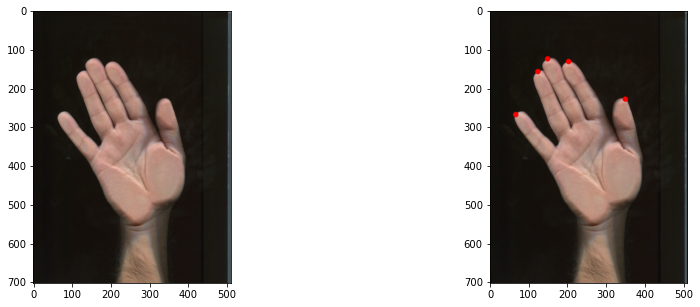

Ответ на задачу:  1-2+3-4+5


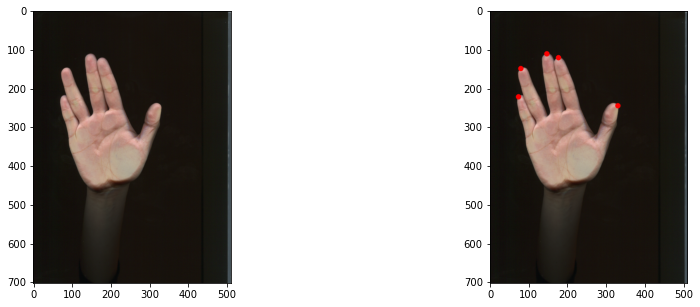

Ответ на задачу:  1-2-3-4-5


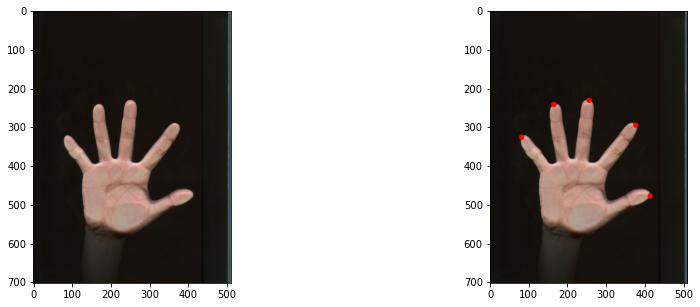

Ответ на задачу:  1-2-3-4-5


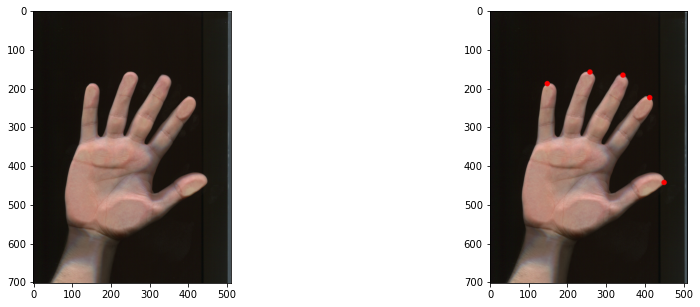

Ответ на задачу:  1-2+3+4+5


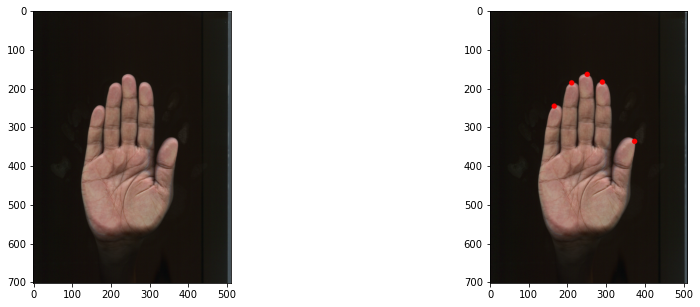

Ответ на задачу:  1-2+3+4-5


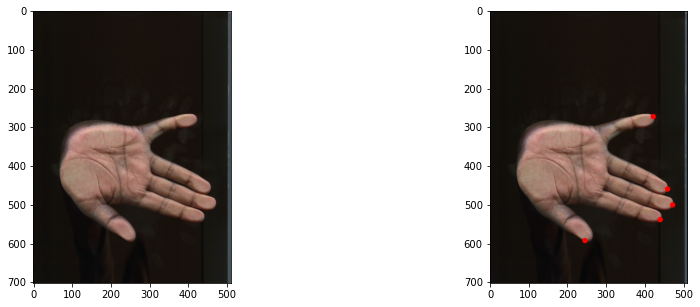

Ответ на задачу:  1+2-3-4-5


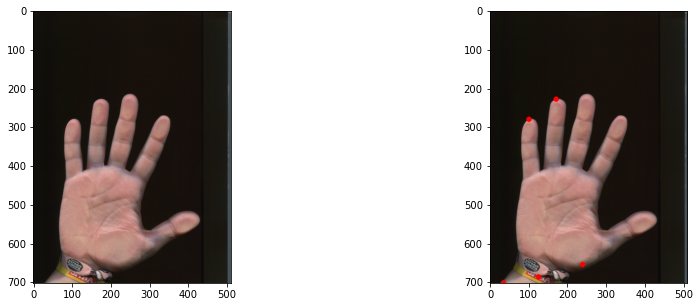

Ответ на задачу:  1-2-3+4+5


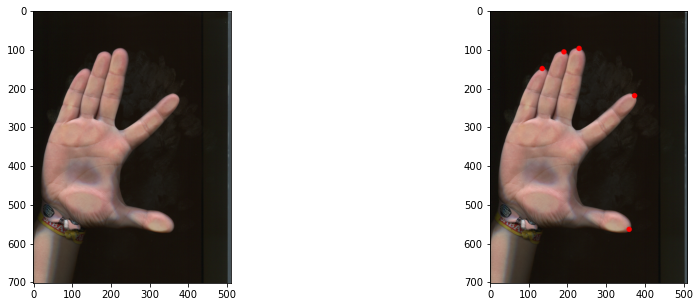

Ответ на задачу:  1-2-3-4-5


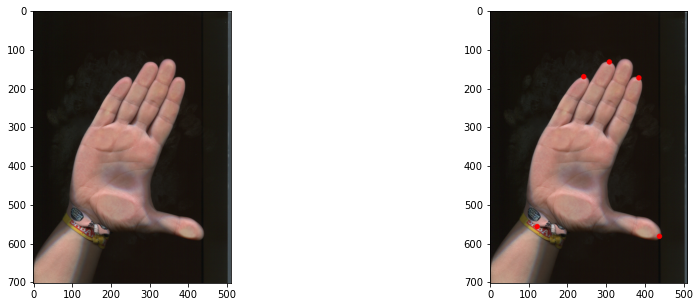

Ответ на задачу:  1-2-3-4-5


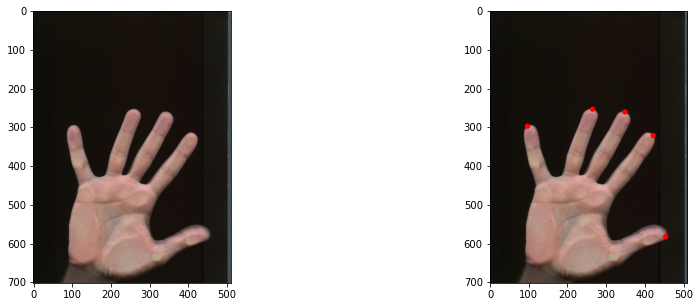

Ответ на задачу:  1-2-3-4-5


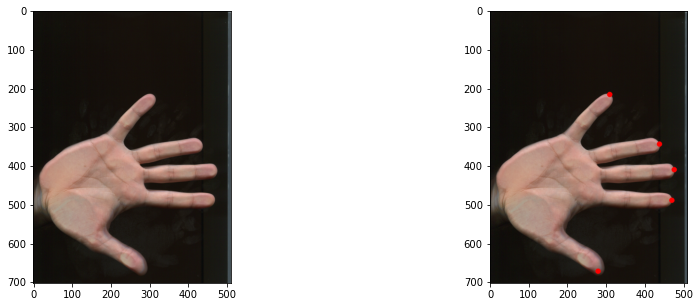

Ответ на задачу:  1-2-3-4-5


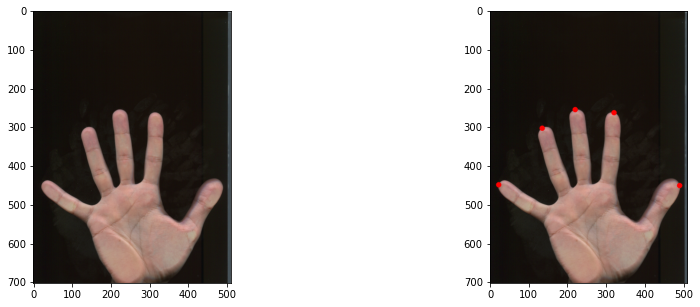

Ответ на задачу:  1-2+3-4-5


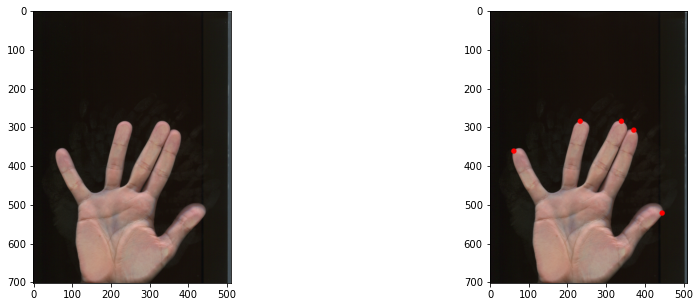

Ответ на задачу:  1+2-3+4+5


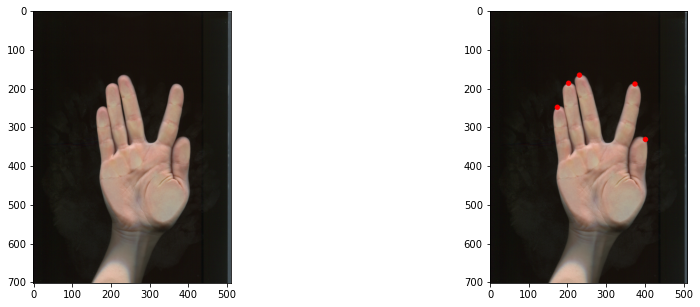

Ответ на задачу:  1-2-3-4-5


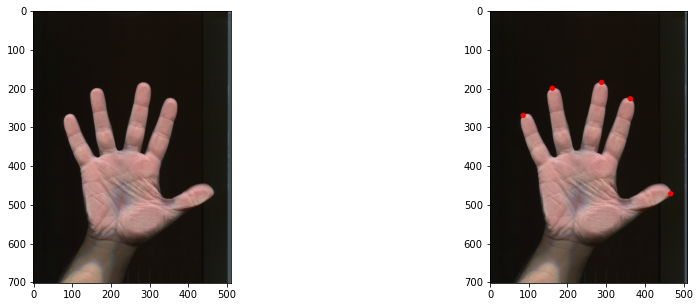

Ответ на задачу:  1-2+3+4-5


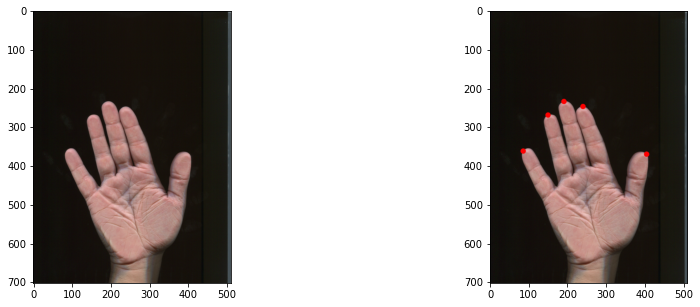

Ответ на задачу:  1-2+3-4-5


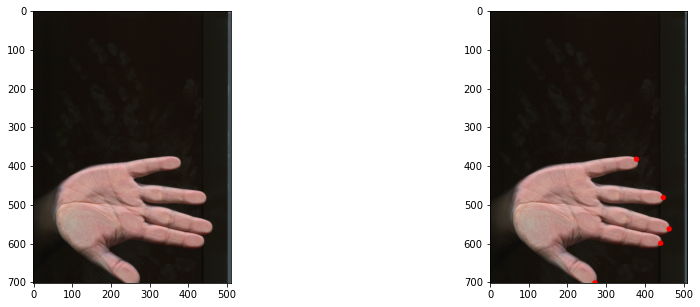

Ответ на задачу:  1-2-3-4-5


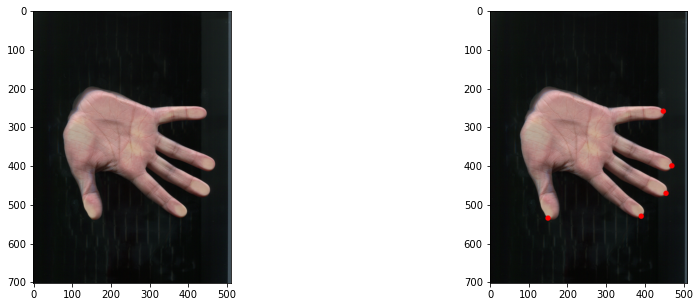

Ответ на задачу:  1-2-3-4-5


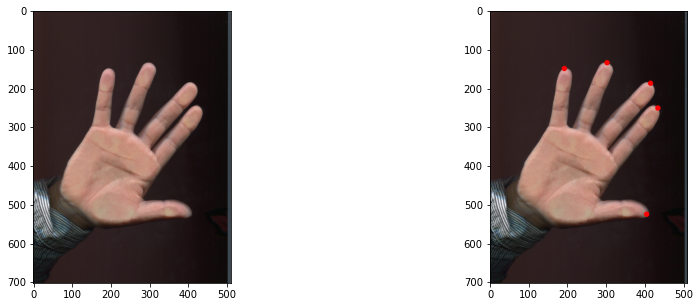

Ответ на задачу:  1-2-3-4-5


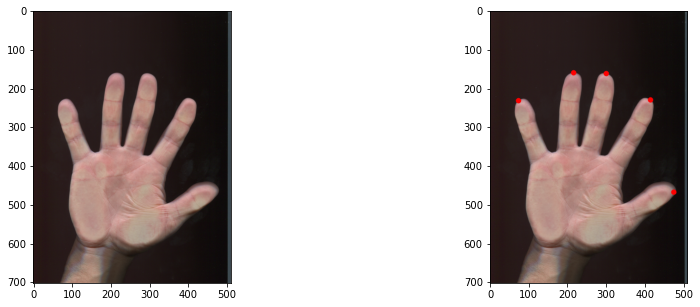

Ответ на задачу:  1-2+3+4-5


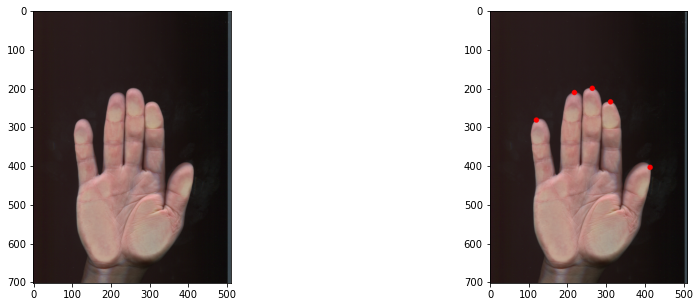

Ответ на задачу:  1-2-3-4-5


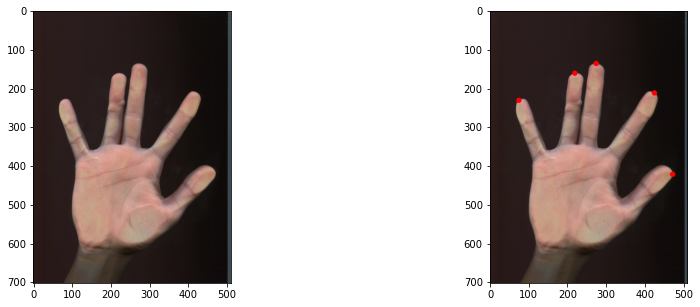

Ответ на задачу:  1-2-3+4+5


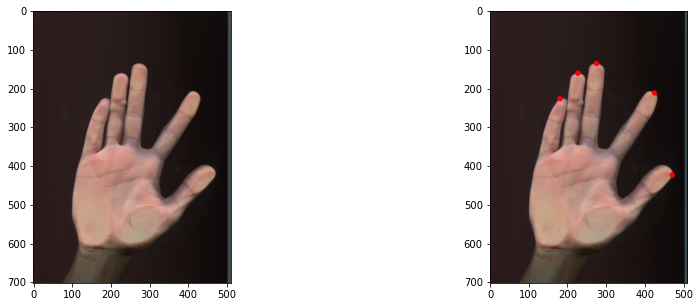

Ответ на задачу:  1-2-3-4-5


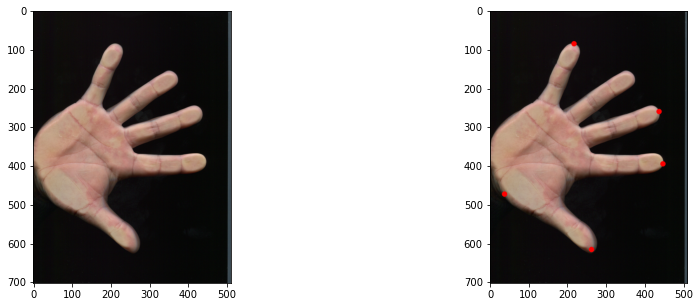

Ответ на задачу:  1-2-3-4-5


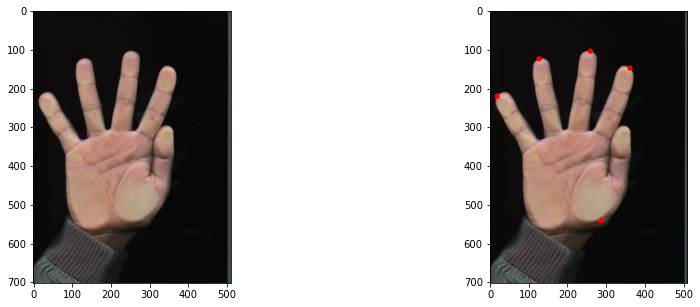

Ответ на задачу:  1-2-3+4-5


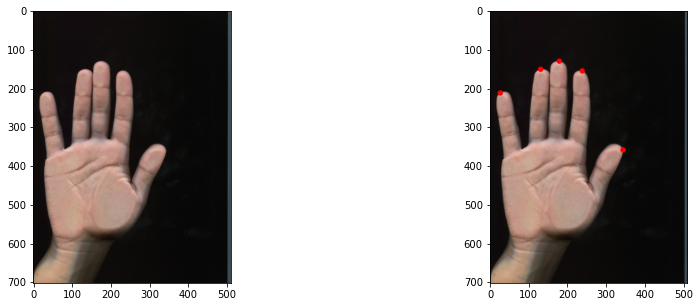

Ответ на задачу:  1-2+3+4+5


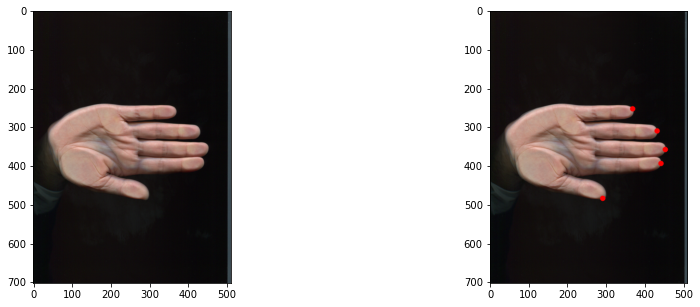

Ответ на задачу:  1+2-3-4-5


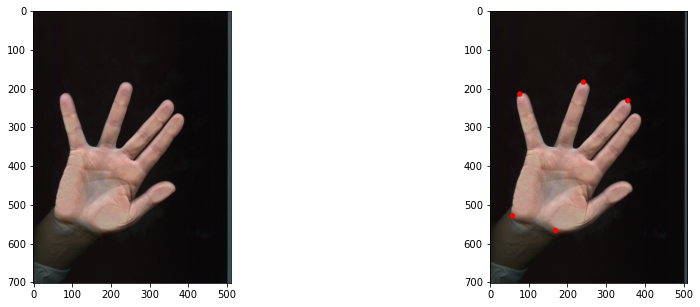

Ответ на задачу:  1+2-3-4-5


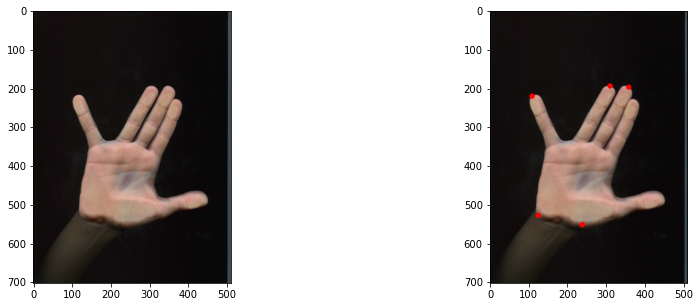

Ответ на задачу:  1-2-3+4+5


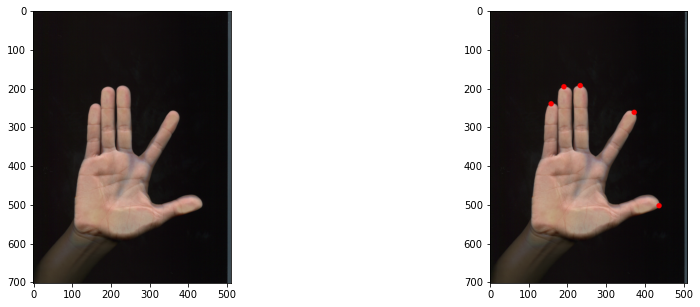

Ответ на задачу:  1+2-3-4-5


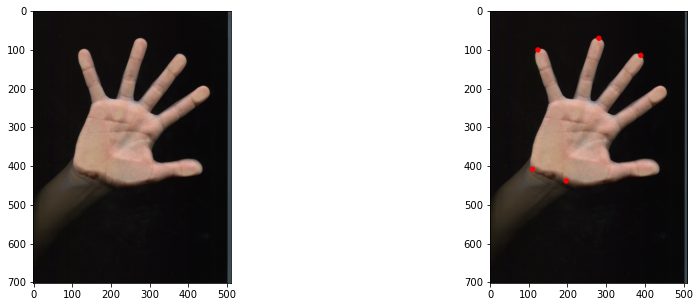

Ответ на задачу:  1+2-3-4-5


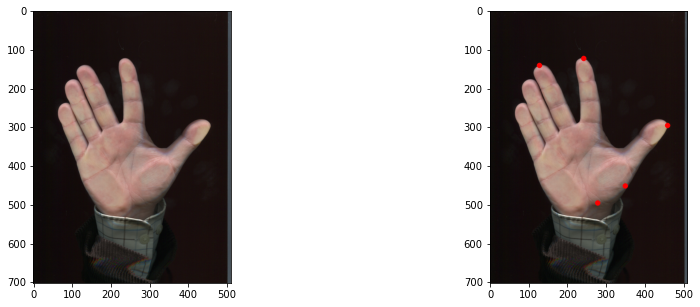

Ответ на задачу:  1-2-3-4-5


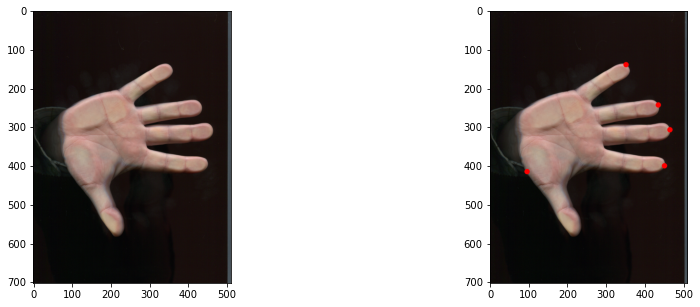

Ответ на задачу:  1-2+3+4+5


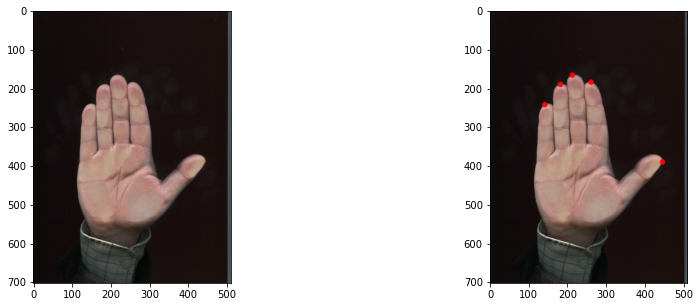

Ответ на задачу:  1-2+3+4-5


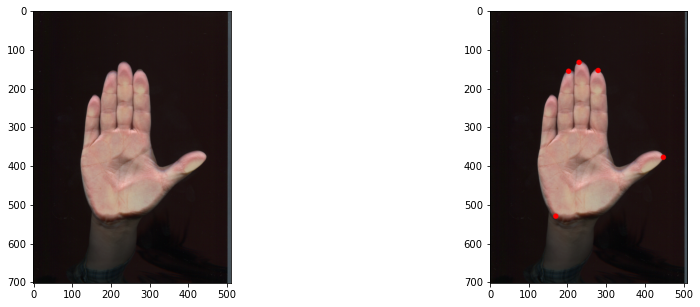

Ответ на задачу:  1+2+3-4+5


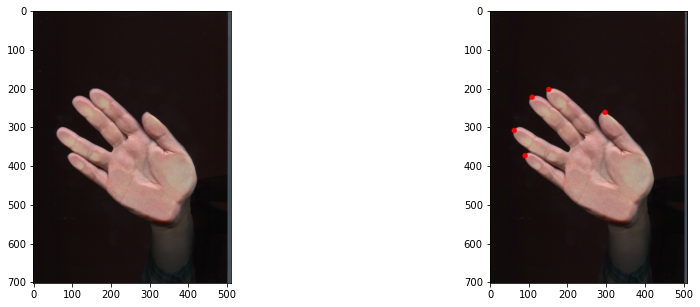

Ответ на задачу:  1+2+3+4+5


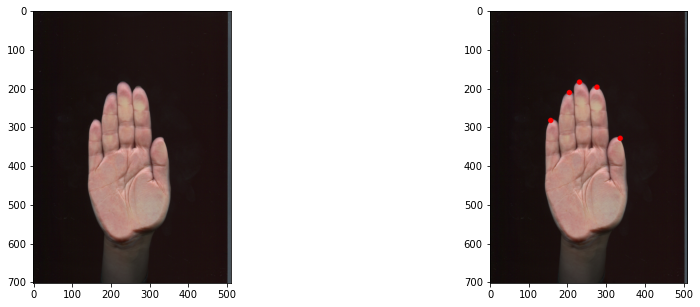

Ответ на задачу:  1-2+3+4-5


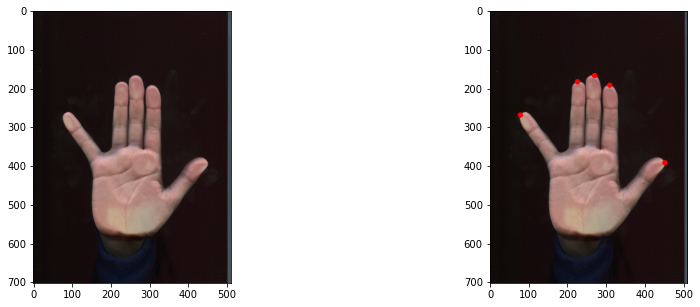

Ответ на задачу:  1+2-3+4-5


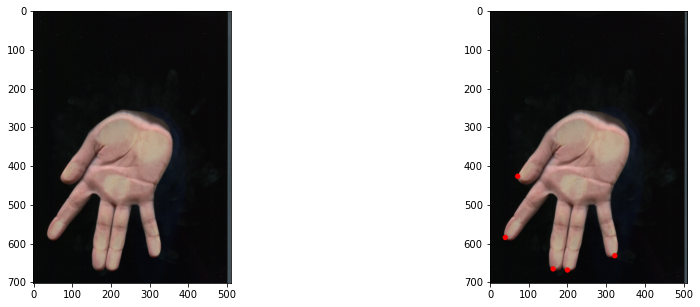

Ответ на задачу:  1-2-3-4-5


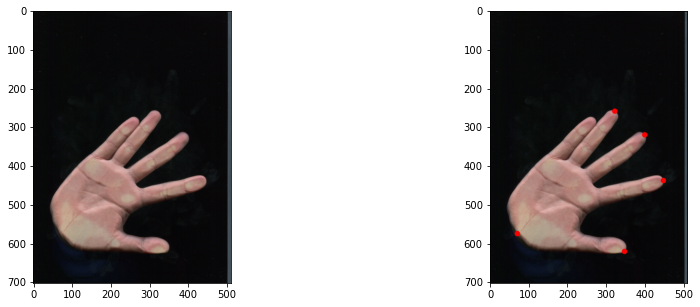

Ответ на задачу:  1+2-3+4-5


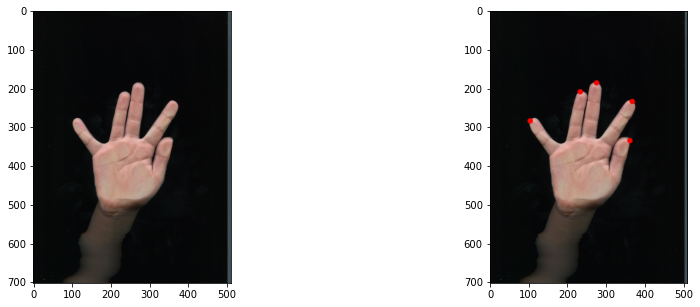

Ответ на задачу:  1+2+3-4-5


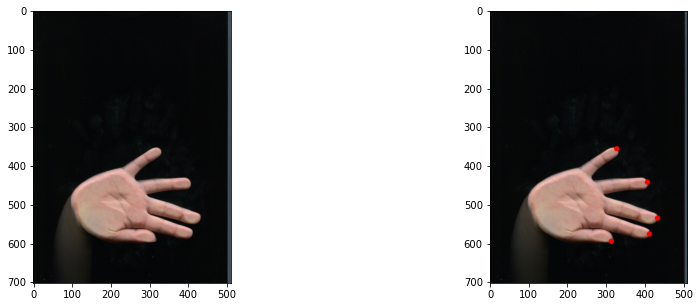

Ответ на задачу:  1-2-3+4+5


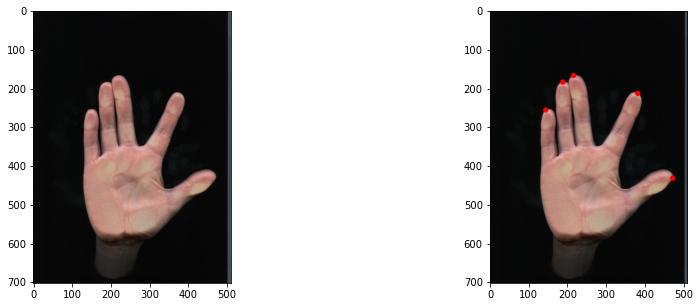

Ответ на задачу:  1+2+3-4+5


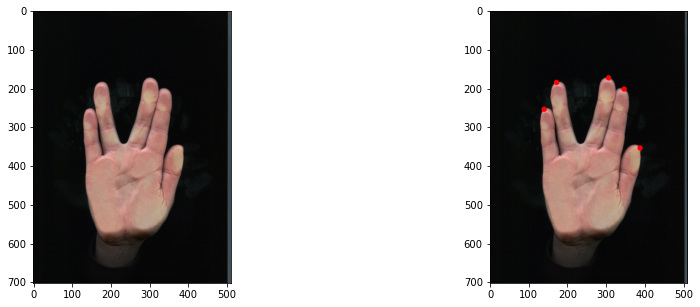

Ответ на задачу:  1-2-3-4+5


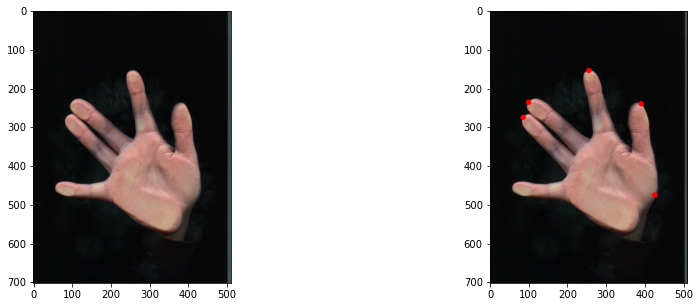

Ответ на задачу:  1-2-3+4-5


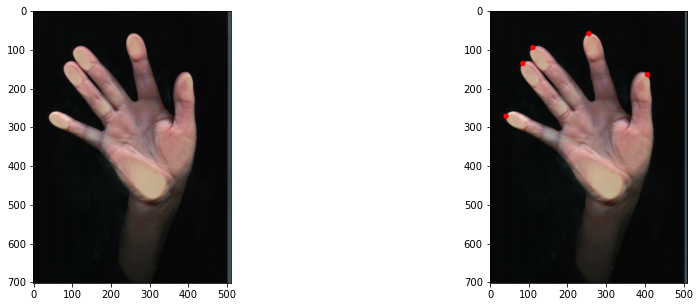

Ответ на задачу:  1-2-3+4-5


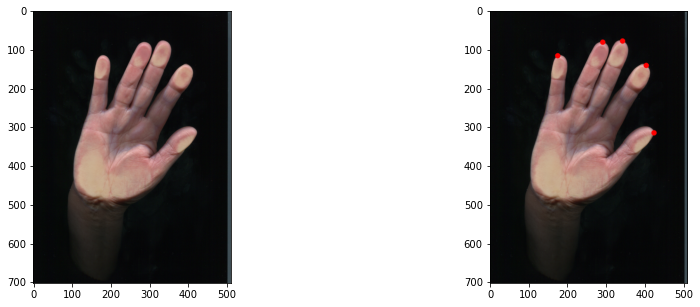

In [25]:
f = open('Result.txt', 'w+')

for n_img in range(len(file_names)):
    # читаем изображение
    file = file_names[n_img]
    img = tiff.imread('./Training/' + file)
    
    # бинаризация + нахождение контура ладони
    img1 = img[:, :, 0]
    _, binary =  cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges,hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    edges_new = []
    for i in edges:
        if len(i) > 400:
            edges_new.append(i)
          
    # считаем центр ладони
    center = calculate_centroide(binary)
    
    # находим нужный контур ладони
    contour = edges_new[0]
    contour = np.roll(contour, -150)
    
    # ищем расстояние от каждой точки контура до центра ладони
    dist = []
    for point in contour:
        dist.append(m.dist(point[0], center))
    dist = np.array(dist)
    
    # находим локальные максимумы и запоминаем информацию о высоте пиков
    peaks, info = find_peaks(dist, height=(50, 350), distance=19, width=7, threshold=(None, 100))
    peak_heights = info['peak_heights']
    
    # убираем пики, которые находятся слишком близко друг к другу (обычно это точки, которые близки к запястью)
    for i in range(info['peak_heights'].shape[0] - 1):
        if (abs(info['peak_heights'][i + 1] - info['peak_heights'][i]) < 2) and (abs(peaks[i + 1] - peaks[i]) < 50):
            peaks = np.delete(peaks, [i, i + 1])
            peak_heights = np.delete(peak_heights, [i, i + 1])
    
    # находим отклонение от средней высоты пиков
    sorting_variabel = np.absolute(peak_heights - np.mean(peak_heights))
    
    # убираем пики, которые со слишком большим отклонением
    while True:
        if peaks.shape[0] == 5:
            break
        max_val = sorting_variabel.max()
        if max_val > 62:
            i = sorting_variabel.argmax()
            peaks = np.delete(peaks, i)
            sorting_variabel = np.delete(sorting_variabel, i)
            peak_heights = np.delete(peak_heights, i)
        else:
            break
        
        
    # сортируем пики по их высоте и по среднему отклонению, и находим средний палец
    dic = dict(zip(peaks, peak_heights))
    dic = dict(sorted(dic.items(), key=lambda item: -item[1]))
    middle_finger = list(dic.keys())[0]

    # peaks_sort[2] - пик, соотвествующий среднему пальцу
    idx = np.where(peaks == middle_finger)[0][0]
    peaks = np.roll(peaks, 2 - idx)
    peaks_sort = peaks[:5]
    
    # для визуализации
    arr_2 = copy.copy(img)  
    tips = []
    for i in peaks_sort:
        tips.append(contour[i])
        
    cv2.circle(arr_2, contour[middle_finger][0], 7, 
                   (255, 0, 0), -1)
    cv2.circle(arr_2, tips[0][0], 7, 
                   (255, 0, 0), -1)
    cv2.circle(arr_2, tips[1][0], 7, 
                   (255, 0, 0), -1)
    cv2.circle(arr_2, tips[3][0], 7, 
                   (255, 0, 0), -1)
    cv2.circle(arr_2, tips[4][0], 7, 
                   (255, 0, 0), -1)
    
    tips1 = contour[peaks_sort[0]][0] #большой палец
    tips2 = contour[peaks_sort[1]][0]
    tips3 = contour[peaks_sort[2]][0]
    tips4 = contour[peaks_sort[3]][0]
    tips5 = contour[peaks_sort[4]][0] #мизинец
    
    # формируем результат
    res = []
    res.append('1')
    if m.dist(tips1, tips2) > 174:
        res.append('-')
    else:
        res.append('+')
    res.append('2')
       
    if m.dist(tips2, tips3) > 62:
        res.append('-')
    else:
        res.append('+')
    res.append('3')
        
    if m.dist(tips3, tips4) > 55:
        res.append('-')
    else:
        res.append('+')
    res.append('4')
        
    if m.dist(tips4, tips5) > 90:
        res.append('-')
    else:
        res.append('+')
    res.append('5')
    
    
    # записываем в файл и выводим результат
    res = "".join(res)
    print('Ответ на задачу: ', res)
    
    f.write(res + '\n')
    f.write('!,' + file +
            ',T ' + str(tips[0][0][0]) + ' ' + str(tips[0][0][1]) +
            ',T ' + str(tips[1][0][0]) + ' ' + str(tips[1][0][1]) +
            ',T ' + str(tips[2][0][0]) + ' ' + str(tips[2][0][1]) +
            ',T ' + str(tips[3][0][0]) + ' ' + str(tips[3][0][1]) +
            ',T ' + str(tips[4][0][0]) + ' ' + str(tips[4][0][1]) +
            ',?' + '\n' )
    
    
    
    # визуализация
    plt_ = 2
    plt.figure(figsize=(15,5))
    plt.subplot(1, plt_, 1)
    plt.imshow(img)
    
    plt.subplot(1, plt_, 2)
    plt.imshow(arr_2.astype('uint8'))
    
    plt.show()
    
f.close()
    